# Wrangle and Analyze WeRateDogs Data
#### By Gabriela Sikora


### Abstract

In this notebook, we will look into three datasets that explore details taken from WeRateDogs, a Twitter account that rates dogs. This will be done to find out what types of dogs are most popular, and which ratings are most frequently provided. This will be done by wrangling and analyzing the data. For an explanation about the process, please read the report found in `wrangle_report.pdf` or `wrangle_report.html`.


### Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#gathering">Gathering Data</a></li>
    <li><a href="#assessing">Assessing Data</a></li>
        <ul>
          <li><a href="#issues">Identified Issues</a></li>
        </ul>
    <li><a href="#cleaning">Cleaning Data</a></li>
    </ul>
<li><a href="#sav">Store, Analyze and Visualize</a></li>
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction

There is an abundance of datasets available within the age of big data. But before one can process all of this information, the fundamentals for handling different types of data and combining them into one manageable dataframe must be learned. In this notebook, we will take data from three different sources related to the Twitter account WeRateDogs, and we will wrangle them into a clean dataframe, from which we will be able to analyze the results. 

In order to understand the data better, I would like to first introduce where it has come from. We are taking the data from a dataset that has been provided by the Udacity Data Analysis Nanodegree and from the Twitter account @dog_rates. This Twitter account is known as WeRateDogs and it has gained a massive following of over 4 million Twitter users. The account revolves around rating dogs out of 10 (or sometimes not 10), and providing a commentary about the photo or video. 

The general purpose of this notebook is to have a clean dataframe which can be analyzed. In particular, I would like to find out which dogs are most popular. This includes most popular names, most popular breeds. Also, I would like to know what the relationship between retweets and favouriting on this dataframe is, and finally I would like to know which ratings are most often provided. Answering these questions will help us understand what it takes to have a popular photo according to WeRateDogs and its Twitter followers.

To find the answers to these questions, we will first wrangle the data by gathering the data, then visually and programatically assess it for any quality and tidiness issues, and clean the data systematically in order to end with a clean, workable dataframe. Then, we will visualize the data and analyze all of the visualizations within the file 'act_report'.



But before we begin, we first need to import all the relevant libraries:
#### Import

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import datetime as dt
import seaborn as sns
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns
# To see all columns in datasets in order to help visual assessment
pd.set_option('display.max_columns', 100)

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check it for cleanliness, and then trim and clean the datasets for analysis. 

<a id='gathering'></a>
### Gathering Data

#### Enhanced WeRateDogs Twitter Archive 

In [3]:
# Read in the dataset
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv', dtype= {'rating_numerator' : np.float64,
                                                                  'rating_denominator' : np.float64})

#### Dog Breed Prediction Based Off of Images

In [4]:
# Create folder if it doesn't already exist
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# Load dataset and check response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [6]:
# Add data to folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
# Read in tsv as csv
predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')

#### WeRateDogs Twitter Archieve via API

This section is commented out as the JSON file has already been created, which you can read in just below. If you would like to create your own then remove the #'s and include your personal consumer key, consumer secret, access token, and access secret.

In [8]:
# # API Keys, Secrets, and Tokens
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

In [9]:
# # Redirect to Twitter and get access token
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# # API instance
# # guidance for this was found here: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
# api = tweepy.API(auth_handler=auth, 
#                  wait_on_rate_limit=True, 
#                  wait_on_rate_limit_notify=True)


In [10]:
# # Twitter API

# # Split into working tweets list and list of tweets with errors
# tweets = []
# errors = []

# tweet_ids = list(enhanced_df['tweet_id'])

# with open('tweet_json.txt', 'w') as file:
#     for tweet_id in tweet_ids:
#         try:
#             # Get extended tweet information via the id
#             extended_tweet = api.get_status(tweet_id, tweet_mode='extended')
#             json.dump(extended_tweet._json, file)
#             file.write('\n')
            
#             # Add to working tweets list
#             tweets.append(tweet_id)
#             print(tweet_id)
        
#         # Support used to better understand TweepError: https://www.programcreek.com/python/example/13279/tweepy.TweepError
#         except tweepy.TweepError as e:
            
#             # Add to list of tweets with errors
#             errors.append(tweet_id)
#             print(tweet_id, e)

In [11]:
# Read in JSON 
tweet_df = pd.read_json('tweet_json.txt', lines = True, encoding = 'utf-8')

<a id='assessing'></a>
### Assessing Data

In this section, we will visually and programmatically assess the 3 datasets to determine whether or not they hold any quality or tidiness issues.

#### Enhanced twitter dataframe assessment

In [12]:
# Overview of all the data
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


In [13]:
# See amount of data within each column, how many rows exist, and the datatypes
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), int64(1)

In [14]:
# Check if texts are robust
enhanced_df.text[400]

'This is Scooter. His lack of opposable thumbs is rendering his resistance to tickling embarrassingly moot. 12/10 would keep tickling https://t.co/F0VWg2GztI'

In [15]:
# See how many images are missing
enhanced_df.expanded_urls.isnull().sum()

59

In [16]:
# See how many images are duplicated
enhanced_df.expanded_urls.duplicated().sum()

137

In [17]:
# Find missing data
enhanced_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# Find number of retweets
enhanced_df.retweeted_status_id.notna().sum()

181

In [19]:
# Look at dog names to ensure they are real names
enhanced_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Bailey          7
Toby            7
an              7
Buddy           7
Milo            6
Jack            6
Bella           6
Scout           6
Stanley         6
Oscar           6
Koda            6
Jax             6
Leo             6
Dave            6
Rusty           6
Gus             5
             ... 
Chesterson      1
Willy           1
Lugan           1
Skittles        1
space           1
Harry           1
Grizzwald       1
Rilo            1
Tug             1
Alexander       1
Raphael         1
Zuzu            1
Jimbo           1
Rodman          1
Baron           1
Rover           1
Amélie          1
Pawnd           1
Lance           1
Jebberson       1
Hall            1
Ron             1
Naphaniel       1
Anna            1
Dale      

In [20]:
# How many doggos are there
enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
# How many floofers are there
enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
# How many puppers are there
enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
# How many puppos are there
enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
# Check row 46 for rating_numerator 
enhanced_df[(enhanced_df.index == 46)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,Grizzwald,None,floofer,None,None


In [25]:
# Code provided by Project Review from Udacity
# Check for decimals in rating numerators column
enhanced_df[enhanced_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [26]:
# Check for decimals in rating denominators column
enhanced_df[enhanced_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_denominator']]

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_denominator
45,This is Bella. She hopes her smile made you sm...,10.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",10.0
695,"This is Logan, the Chow who lived. He solemnly...",10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10.0
1689,I've been told there's a slight possibility he...,10.0
1712,Here we have uncovered an entire battalion of ...,10.0


#### Predicted dog type assessment

In [27]:
# Overview of all the data
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [28]:
# See amount of data within each column, how many rows exist, and the datatypes
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
predictions_df.p1.str.islower().sum()

1135

In [30]:
predictions_df.jpg_url.duplicated().sum()

66

In [31]:
predictions_df.tweet_id.duplicated().sum()

0

In [32]:
predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

#### Twitter API data assessment

In [33]:
# Overview of all the data
tweet_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37684,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8215,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32373,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6076,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24378,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,4017,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41005,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8370,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39209,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,9075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19710,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,3010,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11525,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,1989,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",63574,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,18247,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'

In [34]:
# See amount of data within each column, how many rows exist, and the datatypes
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [35]:
# Check for missing values
tweet_df.isnull().sum()

contributors                     2339
coordinates                      2339
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 274
favorite_count                      0
favorited                           0
full_text                           0
geo                              2339
id                                  0
id_str                              0
in_reply_to_screen_name          2262
in_reply_to_status_id            2262
in_reply_to_status_id_str        2262
in_reply_to_user_id              2262
in_reply_to_user_id_str          2262
is_quote_status                     0
lang                                0
place                            2338
possibly_sensitive                136
possibly_sensitive_appealable     136
quoted_status                    2315
quoted_status_id                 2313
quoted_status_id_str             2313
quoted_status_permalink          2313
retweet_coun

In [36]:
tweet_df.id.duplicated().sum()

0

<a id='issues'></a>
### Identified Issues
Here we can see some of the issues noticed in the dataframes. These quality and tidiness issues will be cleaned in the following section.


#### Quality Issues

##### `enhanced_df` table:
- Retweet information is not needed, so items that are not NaN in `retweet_status_id` can be removed
- Irrelevant columns since we only want to look at original ratings (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
- Missing photo URLs for tweets (`expanded_url`) 
- Erroneous datatype (`timestamp` and `retweeted_status_timestamp` are strings) 
- Erroneous dog names ('a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially' and None are not real names)
- Duplicated rows after melting
- Since the denominators are not always 10, we should normalize the rating


##### `predictions_df` table:
- About half of `p1`, `p2`, and `p3` are not capitalized
- Duplicated images/rows
- Unnecessary underscores (`p1`, `p2`, `p3`)

##### `tweet_df` table:
- Missing data for entire column (`contributors`,`coordinates`,`geo`)
- Missing data for almost entire column (`in_reply_to_screen_name`,`in_reply_to_status_id`,`in_reply_to_status_id_str`,`in_reply_to_status_id_str`,`in_reply_to_user_id`,`in_reply_to_user_id_str`,`place`,`quoted_status`, `quoted_status_id`,`quoted_status_id_str`, `quoted_status_permalink`, `retweeted_status`)
- Column name not clear(`id` should be `tweet_id` to match the other tables)

#### Tidiness Issues
- Single variable `dog_stage` split up into four columns in `enhanced_df` table
- All tables can be combined into one on `tweet_id`

<a id='cleaning'></a>
### Cleaning Data

In this section, we will target the quality and tidiness issues were identified in the previous section, and we will define these issues in more depth, code the solution, and test to ensure proper functionality. 

Before we begin, we should create copies of our dataframes in order to not alter the originals.

In [ ]:
# Create copies
enhanced_df_clean = enhanced_df.copy()
predictions_df_clean = predictions_df.copy()
tweet_df_clean = tweet_df.copy()

### Clean `enhanced_df_clean` table

#### Retweet information is not needed, so items that are not NaN in `retweet_status_id` can be removed
##### Define
Change the datatype of column to string since it is easier to query strings than deal with floats. Then, create a new dataframe with all of the 'nan' values, which indicate that they are not retweets. 

##### Code

In [38]:
# Change `retweeted_status_id` into a string datatype
enhanced_df_clean.retweeted_status_id = enhanced_df_clean.retweeted_status_id.astype('str')

In [39]:
# Update dataframe with just the nan values
enhanced_df_clean = enhanced_df_clean[(enhanced_df_clean.retweeted_status_id == 'nan')]

##### Test

In [40]:
# Check to see if there are any retweets left
enhanced_df_clean.retweeted_status_id.value_counts()

nan    2175
Name: retweeted_status_id, dtype: int64

#### Irrelevant columns since we only want to look at original ratings (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
##### Define
Now that the retweeted dog ratings are removed, we can drop all retweet related columns.

##### Code

In [41]:
# Drop all irrelevant columns
enhanced_df_clean.drop(columns=[
    'in_reply_to_status_id', 
    'in_reply_to_user_id', 
    'retweeted_status_id', 
    'retweeted_status_user_id', 
    'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [42]:
# Check the columns remaining
list(enhanced_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Missing photo URLs for tweets (`expanded_urls`) in the `enhanced_df` table
##### Define
Since we only want original ratings that have images, the tweets that are missing photo URLs will be dropped. 

##### Code

In [43]:
# Drop the tweets that are missing an expanded url
enhanced_df_clean.expanded_urls.dropna(inplace=True)

##### Test

In [44]:
# Check to see if the expanded urls are missing any values
enhanced_df_clean.expanded_urls.isnull().sum()

0

#### Erroneous datatype (`timestamp` and `retweeted_status_timestamp` are strings) in the `enhanced_df` table

##### Define
The datatype of `timestamp` and `retweeted_status_timestamp` in the `enhanced_df` table are strings but it should be datetime. Since `retweeted_status_timestamp` has already been dropped, we can change the datatype of just `timestamp` to datetime.

##### Code

In [45]:
# Datatime information found here: https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
enhanced_df_clean.timestamp = enhanced_df_clean.timestamp.astype('datetime64')

##### Test

In [46]:
# Check the datatypes
enhanced_df_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Erroneous dog names ('a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially', and None are not real names) in the `enhanced_df` table

##### Define
Since 'a', 'an', 'the', 'such', 'his', 'quite' etc. and None are not names, we should preferably replace these with NaN as to not lead to confusion, and to identify that the name is not provided.

##### Code

In [47]:
# https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe
enhanced_df_clean.name.replace(['a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially','None'], np.nan, inplace=True)

##### Test

In [48]:
# Check to see if invalid names are still present
enhanced_df_clean.name.value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Daisy         7
Toby          7
Bella         6
Koda          6
Stanley       6
Bo            6
Oscar         6
Bailey        6
Jax           6
Rusty         5
Chester       5
Buddy         5
Milo          5
Dave          5
Scout         5
Louis         5
Leo           5
Bentley       5
Derek         4
Dexter        4
Maggie        4
             ..
Grizzwald     1
Herschel      1
Harry         1
Birf          1
Amélie        1
Baron         1
Pupcasso      1
Rodman        1
Clarkus       1
Wishes        1
Darrel        1
Butter        1
Anthony       1
Brat          1
Grady         1
Rinna         1
Binky         1
Rizzo         1
Stubert       1
Zeek          1
Jessifer      1
Vince         1
Hubertson     1
Al            1
Ito           1
Alexander     1
Raphael       1
Zuzu          1
Jimbo         1
Aiden         1
Name: name, Length: 937,

#### Tidiness: Single variable `dog_stage` split up into four columns in `enhanced_df` table
##### Define
To put all the dog stages into one column, first we will split the `enhanced_df_clean` table into a df with the dog stages and into a df without the dog stages. For the dataframe without dog stages, we will drop all the dog stage columns. For the dataframe with dog stages, we will melt the columns into one with the results. Then we will concatenate the two cleaned dataframes to create the new `enhanced_df_clean`.

##### 1. Code

In [49]:
# Create dataframe without any dog stages
without_stage = enhanced_df_clean[(enhanced_df_clean.doggo == 'None') 
                                  & (enhanced_df_clean.floofer == 'None') 
                                  & (enhanced_df_clean.pupper == 'None') 
                                  & (enhanced_df_clean.puppo == 'None')]

##### Test

In [50]:
# Check to see that none of the rows have any dog stages
without_stage[(without_stage.doggo != 'None') 
                & (without_stage.floofer != 'None') 
                & (without_stage.pupper != 'None') 
                & (without_stage.puppo != 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [51]:
# Check to see the total rows for dogs without a stage
without_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1831 non-null int64
timestamp             1831 non-null datetime64[ns]
source                1831 non-null object
text                  1831 non-null object
expanded_urls         1779 non-null object
rating_numerator      1831 non-null float64
rating_denominator    1831 non-null float64
name                  1217 non-null object
doggo                 1831 non-null object
floofer               1831 non-null object
pupper                1831 non-null object
puppo                 1831 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 186.0+ KB


##### 2. Code

In [52]:
# Drop the dog stage columns since they now have been checked to ensure nothing is within them
without_stage.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Test

In [53]:
# Check to see if the columns were correctly dropped
without_stage.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin


In [54]:
enhanced_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


##### 3. Code

In [55]:
# Create a dataframe for all dogs with a stage
with_stage = enhanced_df_clean[(enhanced_df_clean.doggo != 'None') 
                                  | (enhanced_df_clean.floofer != 'None') 
                                  | (enhanced_df_clean.pupper != 'None') 
                                  | (enhanced_df_clean.puppo != 'None')]

##### Test

In [56]:
# Check samples to ensure that each dog has a stage
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1053,742465774154047488,2016-06-13 21:16:49,"<a href=""http://twitter.com/download/iphone"" r...",Was just informed about this hero pupper and o...,https://twitter.com/dog_rates/status/742465774...,14.0,10.0,NaN,None,None,pupper,None
1684,681679526984871937,2015-12-29 03:33:58,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,https://twitter.com/dog_rates/status/681679526...,7.0,10.0,NaN,None,None,pupper,None
389,826476773533745153,2017-01-31 17:06:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,12.0,10.0,Pilot,doggo,None,None,None
839,767191397493538821,2016-08-21 02:47:37,"<a href=""http://twitter.com/download/iphone"" r...",I don't know any of the backstory behind this ...,https://twitter.com/dog_rates/status/767191397...,13.0,10.0,NaN,doggo,None,None,None
1340,704859558691414016,2016-03-02 02:43:09,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10.0,10.0,NaN,None,None,pupper,None


##### 4. Code

In [57]:
# Melt the dog stage columns of doggo, floofer, pupper, and puppo into a single column
with_stage = pd.melt(with_stage, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name='dog_type', value_name='dog_stage')

##### Test

In [58]:
# Check sample to see the results
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_stage
1198,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,NaN,puppo,None
744,821407182352777218,2017-01-17 17:21:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,https://twitter.com/dog_rates/status/821407182...,14.0,10.0,Sundance,pupper,None
40,831322785565769729,2017-02-14 02:02:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,https://twitter.com/dog_rates/status/831322785...,12.0,10.0,Pete,doggo,doggo
821,751950017322246144,2016-07-10 01:23:49,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lola. She's a surfing pupper. 13/10 ma...,https://vine.co/v/5WrjaYAMvMO,13.0,10.0,Lola,pupper,pupper
14,871762521631449091,2017-06-05 16:15:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,https://twitter.com/dog_rates/status/871762521...,12.0,10.0,Rover,doggo,None


In [59]:
# Check to see if there's repetition with the name since the indices are different
with_stage[(with_stage.name == 'Rinna')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_stage
291,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10.0,10.0,Rinna,doggo,None
635,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10.0,10.0,Rinna,floofer,None
979,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10.0,10.0,Rinna,pupper,pupper
1323,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10.0,10.0,Rinna,puppo,None


##### 5. Code

In [60]:
# Drop the rows with None since those are just duplicates, and then drop the dog stage
with_stage = with_stage[with_stage.dog_stage != "None"]
with_stage = with_stage.drop('dog_type', axis=1)

##### Test

In [61]:
# Check sample to ensure it worked out
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
804,765371061932261376,2016-08-16 02:14:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,https://twitter.com/dog_rates/status/765371061...,11.0,10.0,Louie,pupper
899,703407252292673536,2016-02-27 02:32:12,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,https://twitter.com/dog_rates/status/703407252...,10.0,10.0,NaN,pupper
733,827933404142436356,2017-02-04 17:34:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,https://twitter.com/dog_rates/status/827933404...,12.0,10.0,Kona,pupper
1007,674447403907457024,2015-12-09 04:36:06,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants a belly rub. This puppe...,https://twitter.com/dog_rates/status/674447403...,10.0,10.0,NaN,pupper
857,736392552031657984,2016-05-28 03:04:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,https://vine.co/v/iEggaEOiLO3,13.0,10.0,NaN,pupper


##### 6. Code

In [62]:
# Concatenate the with and without stage dataframes back into a joined dataframe
enhanced_df_clean = pd.concat([with_stage, without_stage], join='outer', sort=False)

##### Test

In [63]:
# Check to see if it concatenated correctly
enhanced_df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1877,675109292475830276,2015-12-11 00:26:12,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,https://twitter.com/dog_rates/status/675109292...,9.0,10.0,NaN,NaN
416,822610361945911296,2017-01-21 01:02:48,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non-canines like this V...,https://twitter.com/dog_rates/status/822610361...,12.0,10.0,NaN,NaN
551,804475857670639616,2016-12-02 00:02:45,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,https://twitter.com/bvuepd/status/804417859124...,13.0,10.0,NaN,NaN
2298,667070482143944705,2015-11-18 20:02:51,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,10.0,10.0,NaN,NaN
1795,677314812125323265,2015-12-17 02:30:09,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,10.0,10.0,Tassy,NaN
865,730573383004487680,2016-05-12 01:40:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Rooney. He can't comprehend glass. 10/...,https://twitter.com/dog_rates/status/730573383...,10.0,10.0,Rooney,pupper
1084,738402415918125056,2016-06-02 16:10:29,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",https://twitter.com/dog_rates/status/738402415...,10.0,10.0,NaN,NaN
999,748220828303695873,2016-06-29 18:25:21,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,https://vine.co/v/iiLjKuYJpr6,13.0,10.0,NaN,NaN
463,817423860136083457,2017-01-06 17:33:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,https://twitter.com/dog_rates/status/817423860...,13.0,10.0,Ken,NaN
2115,670428280563085312,2015-11-28 02:25:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Willy. He's millennial af. 11/10 https...,https://twitter.com/dog_rates/status/670428280...,11.0,10.0,Willy,NaN


In [64]:
# Check to see if all the dog stages are still present
enhanced_df_clean.dog_stage.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [65]:
# The following 4 are to ensure the cleaned dataframes dog stages match the original dataframe
enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [66]:
enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [67]:
enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [68]:
enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [69]:
enhanced_df_clean.dog_stage.isna().sum()

1831

#### Duplicated rows in `enhanced_df_clean` after melt function applied
##### Define
Due to the melt function, some tweets have been duplicated. First we will look at them to determine if they are worth saving or cleaning, and then we will drop them if they are not worth it.

##### Code

In [70]:
# Create a small DataFrame to assess the duplicates
duplicate_dogs = enhanced_df_clean[enhanced_df_clean.tweet_id.duplicated()]
duplicate_dogs

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
368,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10.0,NaN,floofer
751,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,pupper
760,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,pupper
764,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11.0,10.0,NaN,pupper
766,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,pupper
782,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,pupper
787,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,pupper
809,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,pupper
822,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,NaN,pupper
850,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,NaN,pupper


In [71]:
# Visually assess the duplicates to see if they can be classified and kept
dog_list = list(duplicate_dogs.index)

for x in dog_list:
    print('>', enhanced_df_clean.tweet_id[x], '-', enhanced_df_clean.text[x], '\n')

> 368    854010172552949760
368    828708714936930305
Name: tweet_id, dtype: int64 - 368    At first I thought this was a shy doggo, but i...
368    This is Fiona. She's an exotic dog. Seems rath...
Name: text, dtype: object 

> 751    817777686764523521
751    779056095788752897
Name: tweet_id, dtype: int64 - 751    This is Dido. She's playing the lead role in "...
751    Everybody drop what you're doing and look at t...
Name: text, dtype: object 

> 760    808106460588765185
760    778383385161035776
Name: tweet_id, dtype: int64 - 760    Here we have Burke (pupper) and Dexter (doggo)...
760    This is Nala. She's a future Dogue model. Won'...
Name: text, dtype: object 

> 802265048156610565 - Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze 

> 766    801115127852503040
766    777684233540206592
Name: tweet_id, dtype: int64 - 766    This is Bones. He's being haunted by another d...
766    "Yep... just as I suspected. You're not flossi...
Name: text, dtype: object

These duplicates are usually due to multiple categories being relevant for a single dog photo, or due to multiple dogs in a single photo. For this reason and for the reason that this is a small subset of photos, we can go ahead and remove them altogether.

In [72]:
# Drop all duplicates
enhanced_df_clean.drop([368, 751, 760, 764, 766, 782, 787, 809, 822, 850, 863, 1054], inplace=True)

##### Test

In [73]:
# Check sum of remaining duplicates
enhanced_df_clean[enhanced_df_clean.tweet_id.duplicated()].sum()

tweet_id              0.0
timestamp             0.0
source                0.0
text                  0.0
expanded_urls         0.0
rating_numerator      0.0
rating_denominator    0.0
name                  0.0
dog_stage             0.0
dtype: float64

#### Since the denominators are not always 10, we should normalize the rating

##### Define
Divide `rating_numerator` column by the `rating_denominator` column in order to have a normalized result that we can later assess. Remove any decimal points after 3 as they are not relevant for analysis.

##### Code

In [74]:
# Get normalized rating by dividing numerator by denominator
enhanced_df_clean['rating'] = (enhanced_df_clean['rating_numerator']/enhanced_df_clean['rating_denominator'])

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html 
# Round to 3 decimal points
enhanced_df_clean['rating'] = np.around(enhanced_df_clean.rating, decimals=3, out=None)

##### Test

In [75]:
# Ensure column was properly created
enhanced_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
659,791406955684368384,2016-10-26 22:31:36,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Levi. He's a Madagascan Butterbop...,https://twitter.com/dog_rates/status/791406955...,12.0,10.0,Levi,NaN,1.2
492,813217897535406080,2016-12-26 03:00:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,https://twitter.com/dog_rates/status/813217897...,13.0,10.0,Atlas,NaN,1.3
1400,699446877801091073,2016-02-16 04:15:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,https://twitter.com/dog_rates/status/699446877...,12.0,10.0,Archie,NaN,1.2
1597,686050296934563840,2016-01-10 05:01:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,https://twitter.com/dog_rates/status/686050296...,11.0,10.0,Flávio,NaN,1.1
1020,746757706116112384,2016-06-25 17:31:25,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maddie. She gets some wicked air time....,https://vine.co/v/5BYq6hmrEI3,11.0,10.0,Maddie,NaN,1.1


In [76]:
# Ensure data has 3 decimal points
enhanced_df_clean.rating.value_counts()

1.200      499
1.000      442
1.100      431
1.300      305
0.900      156
0.800       98
0.700       53
1.400       43
0.500       37
0.600       32
0.300       19
0.400       15
0.200       11
0.100        7
42.000       2
0.000        2
0.818        1
1.250        1
0.733        1
1.500        1
inf          1
7.500        1
3.429        1
177.600      1
66.600       1
18.200       1
1.700        1
0.636        1
2.700        1
2.600        1
Name: rating, dtype: int64

### Clean `predictions_df_clean` table

#### About half of `p1`, `p2`, and `p3` are not capitalized in the `predictions_df` table

##### Define
Capitalize all data in `p1`, `p2`, and `p3` within the `predictions_df_clean` table.

##### Code

In [77]:
# Capitalize data within all 3 columns
predictions_df_clean.p1 = predictions_df_clean.p1.str.capitalize()
predictions_df_clean.p2 = predictions_df_clean.p2.str.capitalize()
predictions_df_clean.p3 = predictions_df_clean.p3.str.capitalize()

##### Test

In [78]:
# Check sample to ensure capitalization
predictions_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1365,761599872357261312,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg,1,Gordon_setter,0.240427,True,Saluki,0.224269,True,Doberman,0.129730,True
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,3,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_pyrenees,0.060973,True,Saint_bernard,0.033489,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,Washbasin,0.006321,False,Tub,0.006243,False
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,Golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,Refrigerator,0.007499,False


#### Duplicated images/rows in the `predictions_df` table

##### Define
Identify the data that are duplicated in the `predictions_df` table and keep the first data of the duplicates set.

##### Code

In [79]:
# Remove duplicates, but keep the first result
predictions_df_clean.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

##### Test

In [80]:
# Check total of duplicated data
predictions_df_clean.duplicated().sum()

0

#### Unnecessary underscores (`p1`, `p2`, `p3`)
##### Define
The dog breeds have unnecessary underscores '_' between words, so we will replace them with spaces ' '.

##### Code

In [81]:
# https://stackoverflow.com/questions/28986489/python-pandas-how-to-replace-a-characters-in-a-column-of-a-dataframe
predictions_df_clean.p1 = predictions_df_clean.p1.str.replace('_', ' ')
predictions_df_clean.p2 = predictions_df_clean.p2.str.replace('_', ' ')
predictions_df_clean.p3 = predictions_df_clean.p3.str.replace('_', ' ')

##### Test

In [82]:
# Check sample to ensure underscores are replaced with spaces
predictions_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,Beagle,0.162585,True,Pembroke,0.120481,True,Siberian husky,0.110284,True
112,667911425562669056,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1,Frilled lizard,0.257695,False,Ox,0.235160,False,Triceratops,0.085317,False
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,Toy poodle,0.966896,True,Miniature poodle,0.016424,True,Cocker spaniel,0.010227,True
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,Bathtub,0.368660,False,Golden retriever,0.297402,True,Tub,0.201711,False
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard poodle,0.351308,True,Toy poodle,0.271929,True,Tibetan terrier,0.094759,True


### Clean `tweet_df_clean` table

#### Missing data for entire column (`contributors`,`coordinates`,`geo`) in `tweet_df` table

##### Define
Drop `contributors`, `coordinates`, and `geo` columns in `tweet_df` table

##### Code

In [83]:
# Dropping columns correctly: https://stackoverflow.com/questions/21457917/pandas-dataframe-dropped-column-appearing-again
tweet_df_clean.drop(columns=['contributors', 'coordinates', 'geo'], axis=1, inplace=True)

##### Test

In [84]:
# Confirm columns are gone
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

#### Missing data for almost entire column (`in_reply_to_screen_name`,`in_reply_to_status_id`,`in_reply_to_status_id_str`,`in_reply_to_status_id_str`,`in_reply_to_user_id`,`in_reply_to_user_id_str`,`place`,`quoted_status`, `quoted_status_id`,`quoted_status_id_str`, `quoted_status_permalink`)  in `tweet_df` table

##### Define
Since these columns do not play a major role and are not relevant for the analyses and visualizations that we will conduct, they will be dropped as well. In addition, these columns will also be dropped due to the fact that they are also not playing a role in analysis: (`retweeted_status`, `entities`, `extended_entities`,`id_str`,`is_quote_status`,`possibly_sensitive`, `possibly_sensitive_appealable`, `truncated`, `user`).

##### Code

In [85]:
# Name and drop all unnecessary columns
tweet_df_clean.drop(columns=['in_reply_to_screen_name',
                             'in_reply_to_status_id',
                             'in_reply_to_status_id_str',
                             'in_reply_to_status_id_str',
                             'in_reply_to_user_id',
                             'in_reply_to_user_id_str',
                             'place',
                             'quoted_status',
                             'quoted_status_id',
                             'quoted_status_id_str',
                             'quoted_status_permalink', 
                             'retweeted_status',
                             'entities',
                             'extended_entities',
                             'id_str',
                             'is_quote_status',
                             'possibly_sensitive',
                             'possibly_sensitive_appealable',
                             'truncated',
                             'user'], axis=1, inplace=True)

##### Test

In [86]:
# Confirm columns are gone
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'lang',
 'retweet_count',
 'retweeted',
 'source']

#### Column name not clear(`id` should be `tweet_id` to match the other tables) in `tweet_df` table
##### Define
Find the column named 'id' and rename it to be 'tweet_id'

##### Code

In [87]:
# If the name is id, rename as tweet_id
tweet_df_clean.rename(columns={'id':'tweet_id'}, inplace=True)

##### Test

In [88]:
# Check to see that tweet_id replaced id
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'favorite_count',
 'favorited',
 'full_text',
 'tweet_id',
 'lang',
 'retweet_count',
 'retweeted',
 'source']

#### All tables can be combined into one on `tweet_id`
##### Define
Merge `enhanced_df_clean` with `predictions_df_clean` and `tweet_id`

##### Code

In [89]:
# Merge the three dataframes to create a master dataframe
master_df = enhanced_df_clean.merge(predictions_df_clean, how='inner', on='tweet_id').merge(tweet_df_clean, how='inner', on='tweet_id')

##### Test

In [90]:
# Check to see the completeness of the dataframe
master_df.sample(20)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,favorite_count,favorited,full_text,lang,retweet_count,retweeted,source_y
42,786363235746385920,2016-10-13 00:29:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,https://twitter.com/dog_rates/status/786363235...,13.0,10.0,Rizzo,doggo,1.3,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,1,Golden retriever,0.929266,True,Labrador retriever,0.062867,True,Saluki,0.002157,True,2016-10-13 00:29:39,"[0, 83]",11543,False,This is Rizzo. He has many talents. A true ren...,en,3792,False,"<a href=""http://twitter.com/download/iphone"" r..."
559,823581115634085888,2017-01-23 17:20:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Crawford. He's quite h*ckin good at th...,https://twitter.com/dog_rates/status/823581115...,11.0,10.0,Crawford,NaN,1.1,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,Dingo,0.280949,False,German shepherd,0.194044,True,Pembroke,0.120051,True,2017-01-23 17:20:14,"[0, 106]",13690,False,This is Crawford. He's quite h*ckin good at th...,en,2847,False,"<a href=""http://twitter.com/download/iphone"" r..."
1692,671182547775299584,2015-11-30 04:22:44,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,https://twitter.com/dog_rates/status/671182547...,12.0,10.0,NaN,NaN,1.2,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,Rottweiler,0.331179,True,Kelpie,0.218601,True,Appenzeller,0.182520,True,2015-11-30 04:22:44,"[0, 89]",1124,False,This pup holds the secrets of the universe in ...,en,351,False,"<a href=""http://twitter.com/download/iphone"" r..."
1850,668480044826800133,2015-11-22 17:23:57,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,https://twitter.com/dog_rates/status/668480044...,11.0,10.0,DayZ,NaN,1.1,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic fox,0.119243,False,Labrador retriever,0.099965,True,Pug,0.086717,True,2015-11-22 17:23:57,"[0, 138]",461,False,Say hello to DayZ. She is definitely stuck on ...,en,150,False,"<a href=""http://twitter.com/download/iphone"" r..."
842,759557299618865152,2016-07-31 01:12:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,https://twitter.com/dog_rates/status/759557299...,10.0,10.0,Emma,NaN,1.0,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,Golden retriever,0.763333,True,Chesapeake bay retriever,0.194251,True,Labrador retriever,0.012225,True,2016-07-31 01:12:26,"[0, 113]",4921,False,This is Emma. She can't believe her last guess...,en,1252,False,"<a href=""http://twitter.com/download/iphone"" r..."
1357,684567543613382656,2016-01-06 02:49:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,https://twitter.com/dog_rates/status/684567543...,4.0,10.0,Bobby,NaN,0.4,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,Minibus,0.401942,False,Llama,0.229145,False,Seat belt,0.209393,False,2016-01-06 02:49:55,"[0, 140]",3129,False,This is Bobby. He doesn't give a damn about pe...,en,1298,False,"<a href=""http://twitter.com/download/iphone"" r..."
1977,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,0.5,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,2015-11-16 00:24:50,"[0, 120]",105,False,Here we have a 1949 1st generation vulpix. Enj...,en,42,False,"<a href=""http://twitter.com/download/iphone"" r..."
1550,674800520222154752,2015-12-10 03:59:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,h

<a id='sav'></a>
## Store, Analyze & Visualize

### Store

In [91]:
# Store the clean DataFrame in a CSV file
master_df.to_csv("twitter_archive_master.csv", index=False, encoding='utf8')

### Analyze & Visualize

In this section, we will look at trends within this dataframe, as well look at exceptional cases. 

In [92]:
# Look at major trends of each numeric column, including minimum values, maximum values, and the mean.
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.982000e+03,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1.982000e+03,1982.000000,1982.000000
mean,7.356204e+17,12.284057,10.535318,1.169214,1.203835,0.593097,1.345195e-01,6.026449e-02,8619.874874,2612.486882
std,6.753056e+16,41.623108,7.342732,4.079362,0.561984,0.271862,1.005986e-01,5.079365e-02,12688.875689,4681.793557
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,76.000000,11.000000
25%,6.758041e+17,10.000000,10.000000,1.000000,1.000000,0.362656,5.415523e-02,1.628435e-02,1851.000000,582.000000
50%,7.081252e+17,11.000000,10.000000,1.100000,1.000000,0.587222,1.175370e-01,4.950530e-02,3857.500000,1253.500000
75%,7.879824e+17,12.000000,10.000000,1.200000,1.000000,0.843883,1.951377e-01,9.155482e-02,10733.500000,2960.250000
max,8.924206e+17,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,162708.000000,82793.000000


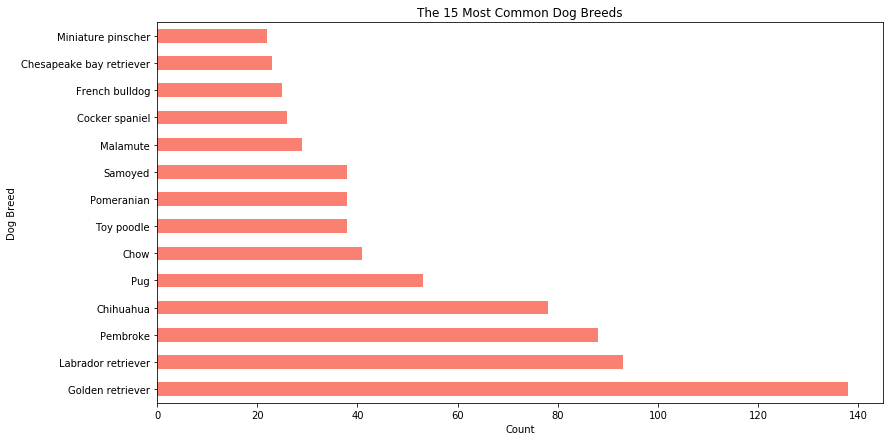

In [93]:
# Most common dog breeds
pop_dog_breeds = master_df.p1.value_counts()[:14]
pop_dog_breeds.plot(kind = 'barh', title = 'The 15 Most Common Dog Breeds', color='salmon', figsize=(13,7))
plt.xlabel('Count')
plt.ylabel('Dog Breed')
plt.title('The 15 Most Common Dog Breeds');

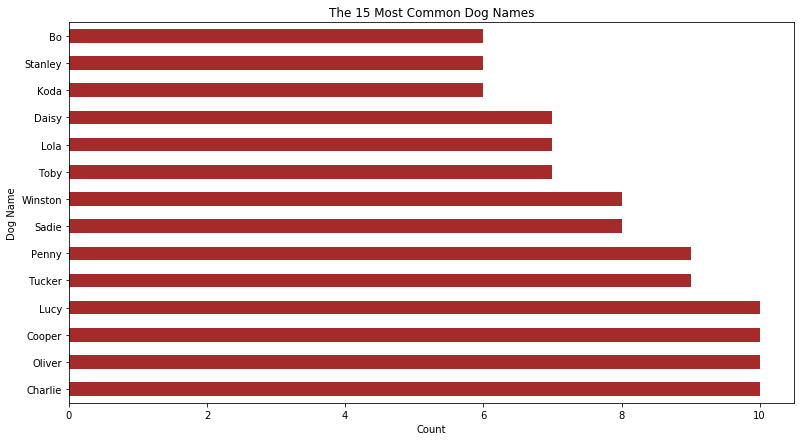

In [94]:
# Most common dog breeds
pop_dog_names = master_df.name.value_counts()[:14]
pop_dog_names.plot(kind = 'barh', title = 'The 15 Most Common Dog Names', color='brown', figsize=(13,7))
plt.xlabel('Count')
plt.ylabel('Dog Name')
plt.title('The 15 Most Common Dog Names');

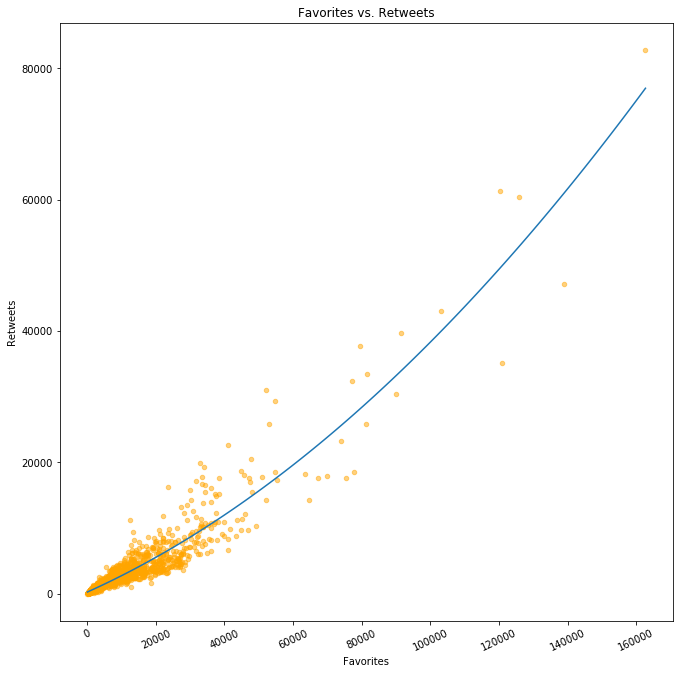

In [95]:
# Favorites vs. Retweets
master_df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'orange', figsize=(11,11));
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorites vs. Retweets')
plt.xticks(rotation=25)

# https://stackoverflow.com/questions/18767523/fitting-data-with-numpy/18767992
# Add the line of best fit
x = master_df.favorite_count
y = master_df.retweet_count
p = Polynomial.fit(x, y, 2)
plt.plot(*p.linspace());

In [96]:
# Find the dog tweet with the highest retweet and favorite count
master_df[(master_df.retweet_count >= 70000)]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,favorite_count,favorited,full_text,lang,retweet_count,retweeted,source_y
64,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,1.3,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador retriever,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True,2016-06-18 18:26:18,"[0, 91]",162708,False,Here's a doggo realizing you can stand in a po...,en,82793,False,"<a href=""http://twitter.com/download/iphone"" r..."


In [97]:
# See the post of the most popular dog
master_df.expanded_urls.values[64]

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

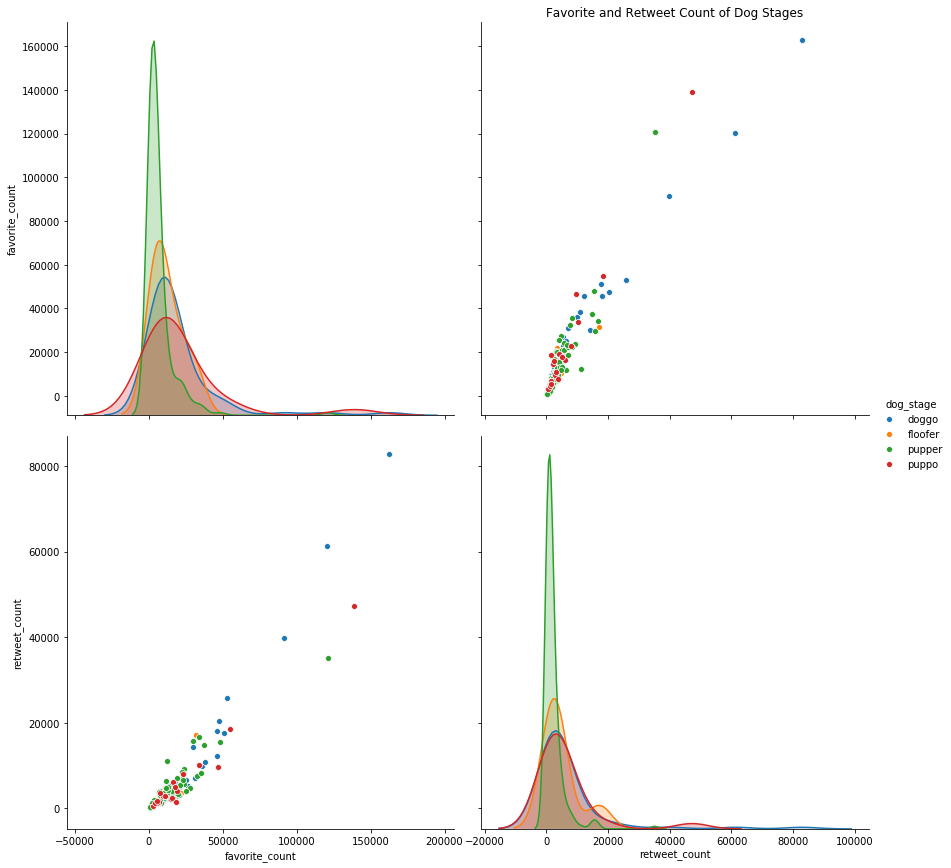

In [98]:
# Favorite and Retweet Count of Dog Stages
sns.pairplot(master_df, hue="dog_stage", vars=["favorite_count", "retweet_count"], height=6)
plt.title('Favorite and Retweet Count of Dog Stages');

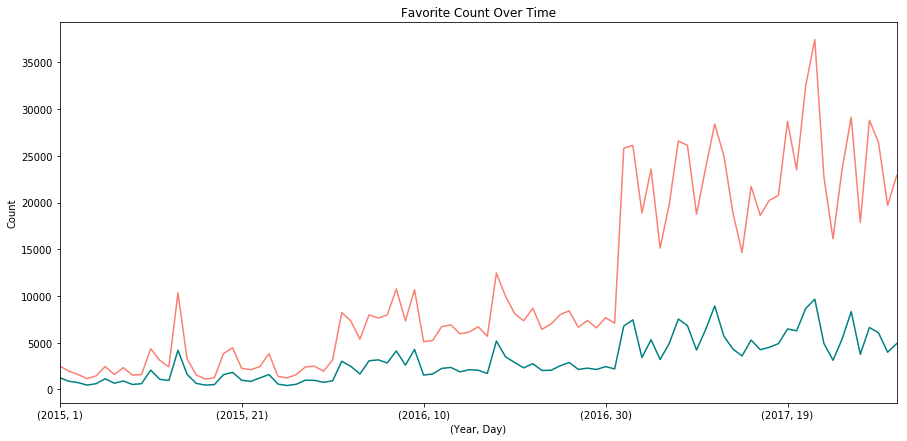

In [99]:
# Favorite count over time
master_df.favorite_count.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.day]).mean().plot(color='salmon', figsize=(15,7))
master_df.retweet_count.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.day]).mean().plot(color='teal')
plt.title('Favorite Count Over Time')
plt.ylabel('Count')
plt.xlabel('(Year, Day)');

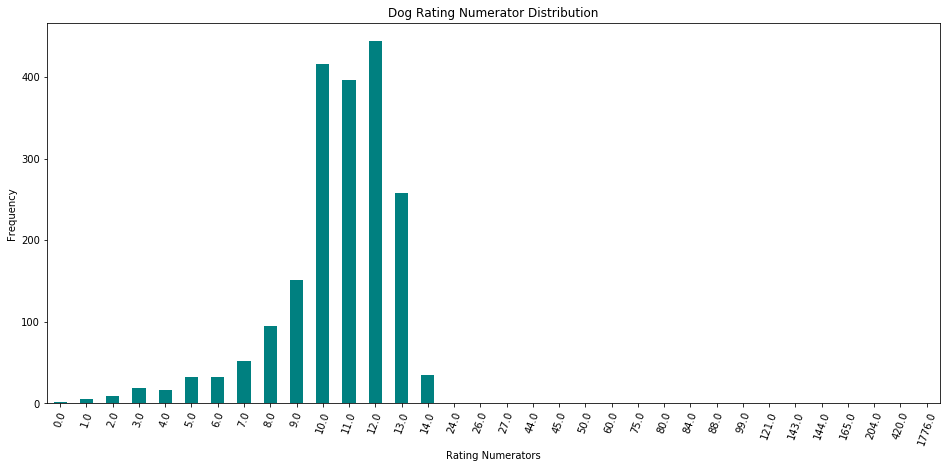

In [100]:
# Most common ratings along the distribution
master_df.rating_numerator.value_counts().sort_index().plot('bar', figsize=(16,7), color='teal')
plt.xlabel('Rating Numerators')
plt.ylabel('Frequency')
plt.title('Dog Rating Numerator Distribution')
plt.xticks(rotation=70);

In [101]:
# Gather the tweets that are the lowest scores of 0 and 1
bad_dogs = master_df[(master_df.rating_numerator == 0) | (master_df.rating_numerator == 1)]

In [102]:
# Check the photo and description of each tweet to see why the ratings are as low as they are
for x in bad_dogs.index:
    print(master_df.expanded_urls.values[x])

https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1
https://twitter.com/dog_rates/status/746906459439529985/photo/1
https://twitter.com/dog_rates/status/675153376133427200/photo/1
https://twitter.com/dog_rates/status/670783437142401025/photo/1
https://twitter.com/dog_rates/status/667549055577362432/photo/1
https://twitter.com/dog_rates/status/666287406224695296/photo/1
https://twitter.com/dog_rates/status/666104133288665088/photo/1


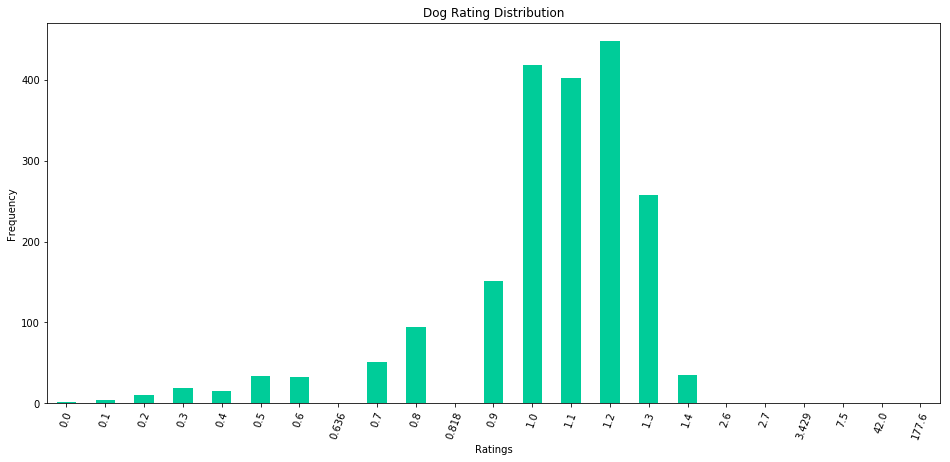

In [104]:
# Most common ratings along the distribution
master_df.rating.value_counts().sort_index().plot('bar', figsize=(16,7), color='#00cc99')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Dog Rating Distribution')
plt.xticks(rotation=70);

<a id='conclusion'></a>
## Conclusion

In this notebook we explored the WeRateDogs dataframe, which helped us identify the most popular dog names and breeds, helped us see how strong of a correlation the favorites and retweets have, and helped us see which ratings were most common. For a detailed analysis of the visualizations created, please look at the report found in `act_report.pdf` or `act_report.html`. 

These results help us understand the common behaviour of WeRateDogs rating and the types of dogs that are common. In particular, we know that Golden Retrievers named Charlie are very popular among WeRateDogs posts. However, a limitation of this analysis is that the data was not uniform, as the ratings are often random. That is simultaneously the biggest charm of this data but also a drawback when trying to come to major conclusions. 

Additional steps that can be taken on this dataframe would be to match retweeting, favoriting, and ratings to dog breeds and names. 

<a id='references'></a>
## References

The vast majority of information for this notebook comes from the Udacity Data Analysis Nanodegree and the Twitter account WeRateDogs. Beyond that, each additional resource is mentioned above the code that makes use of it.